In [1]:
import os
import pandas as pd

In [18]:
GEFC2012_solution = pd.read_csv(os.path.join('data', 'GEFC2012_solution.csv'))
GEFC2012_bronze_prediction = pd.read_csv(os.path.join('data', 'GEFC2012_bronze.csv'))
GEFC2012_benchmark_prediction = pd.read_csv(os.path.join('data', 'GEFC2012_benchmark.csv'))

# sort by date
GEFC2012_bronze_prediction = GEFC2012_bronze_prediction.sort_values('date').reset_index(drop=True).dropna()
id = GEFC2012_bronze_prediction['id']
# clip to 0 and 1
GEFC2012_bronze_prediction = GEFC2012_bronze_prediction.clip(0, 1)

GEFC2012_solution = GEFC2012_solution.sort_values('date').reset_index(drop=True)
# only select the rows that are in the id
GEFC2012_solution = GEFC2012_solution[GEFC2012_solution['id'].isin(id)].reset_index(drop=True)
GEFC2012_benchmark_prediction = GEFC2012_benchmark_prediction.sort_values('date').reset_index(drop=True)
GEFC2012_benchmark_prediction = GEFC2012_benchmark_prediction[GEFC2012_benchmark_prediction['id'].isin(id)].reset_index(drop=True)

In [3]:
GEFC2012_solution

,id,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,1,2011010101,0.471,0.000,0.968,0.733,0.920,0.763,0.808
1,2,2011010102,0.491,0.000,0.949,0.788,0.940,0.579,0.859
2,3,2011010103,0.551,0.196,0.968,0.485,0.956,0.553,0.682
3,4,2011010104,0.456,0.439,0.978,0.435,0.829,0.421,0.657
4,5,2011010105,0.471,0.767,0.978,0.336,0.672,0.382,0.581
...,...,...,...,...,...,...,...,...,...
7483,7484,2012062808,0.060,0.307,0.375,0.160,0.131,0.184,0.126
7484,7485,2012062809,0.085,0.217,0.346,0.121,0.066,0.118,0.177
7485,7486,2012062810,0.085,0.090,0.296,0.220,0.020,0.184,0.202
7486,7487,2012062811,0.090,0.021,0.247,0.303,0.005,0.224,0.177


In [4]:
GEFC2012_bronze_prediction

,id,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,1,1,0.524630,0.077325,0.698577,0.588884,0.460156,0.404131,0.735254
1,1,1,0.446812,0.082432,0.655841,0.580865,0.437460,0.403475,0.740283
2,1,1,0.416419,0.046493,0.712602,0.534203,0.464874,0.415002,0.762918
3,1,1,0.425717,0.161114,0.699641,0.584711,0.443305,0.447642,0.805233
4,1,1,0.417206,0.580054,0.699915,0.625167,0.399276,0.493852,0.842536
...,...,...,...,...,...,...,...,...,...
7483,1,1,0.154146,0.333470,0.238140,0.135036,0.048224,0.152685,0.323158
7484,1,1,0.199491,0.334636,0.263491,0.149263,0.064369,0.182363,0.331213
7485,1,1,0.170261,0.315976,0.242826,0.161876,0.081759,0.170915,0.303780
7486,1,1,0.123320,0.366438,0.218197,0.151191,0.069493,0.136110,0.289955


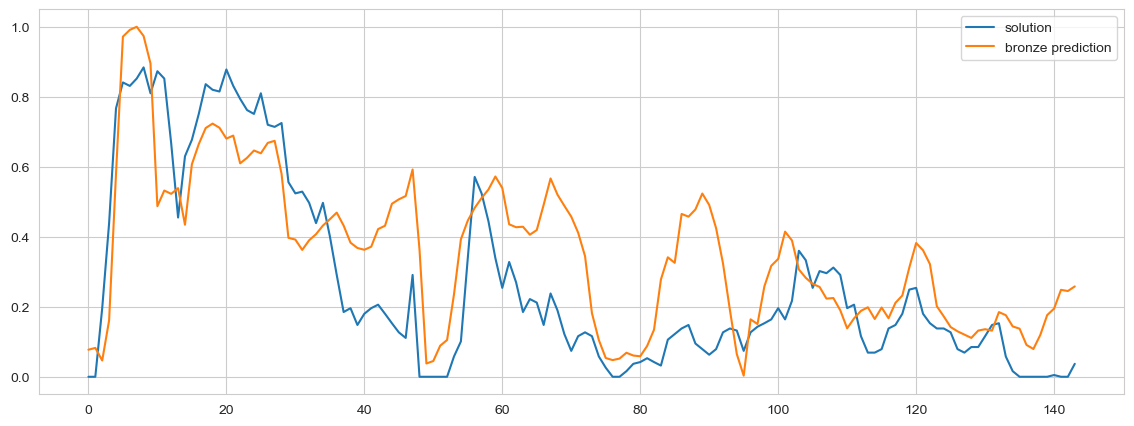

In [5]:
# plot the solution and the prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(GEFC2012_solution['wp2'].iloc[:144], label='solution')
plt.plot(GEFC2012_bronze_prediction['wp2'].iloc[:144], label='bronze prediction')
# plt.plot(GEFC2012_benchmark_prediction['wp2'], label='benchmark prediction')
plt.legend()

In [6]:
# calculate the RMSE for each column, and get the average RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_bronze = []
rmse_benchmark = []
for i in range(1, 8):
    rmse_bronze.append(np.sqrt(mean_squared_error(GEFC2012_solution[f'wp{i}'], GEFC2012_bronze_prediction[f'wp{i}'])))
    rmse_benchmark.append(np.sqrt(mean_squared_error(GEFC2012_solution[f'wp{i}'], GEFC2012_benchmark_prediction[f'wp{i}'])))
    
print(f'Average RMSE for bronze prediction: {np.mean(rmse_bronze)}')
print(f'Average RMSE for benchmark prediction: {np.mean(rmse_benchmark)}')


Average RMSE for bronze prediction: 0.1772358516547999
Average RMSE for benchmark prediction: 0.35269342516561586


This RMSE is indeed the Bronze level based on the leaderboard

In [7]:
rmse_bronze

[0.17033767654545107,
 0.15451042422616254,
 0.18908018311972277,
 0.16853604837821254,
 0.1795196212166172,
 0.16939067171502134,
 0.20927633638241191]

In [8]:
# get the forecasting error matrix

# we only use wp2
GEFC2012_bronze_prediction_wp2 = GEFC2012_bronze_prediction[['id', 'date', 'wp2']].copy()
GEFC2012_solution_wp2 = GEFC2012_solution[['id', 'date', 'wp2']].copy()
error_df = GEFC2012_solution_wp2.copy()
error_df['error'] = GEFC2012_solution_wp2['wp2'] - GEFC2012_bronze_prediction_wp2['wp2']
error_df.drop('wp2', axis=1, inplace=True)

# note that the evaluation data has the following pattern: it displays forecasts from 0-24 for two days, then 12-36 for two days, and so on. Therefore, we need to treat these two differently
error_array = error_df['error'].values.reshape(-1, 48)
error = error_array.copy()
# error = np.concatenate([error_p1[:, :24], error_p1[:, 24:]], axis=0)
error.shape

(156, 48)

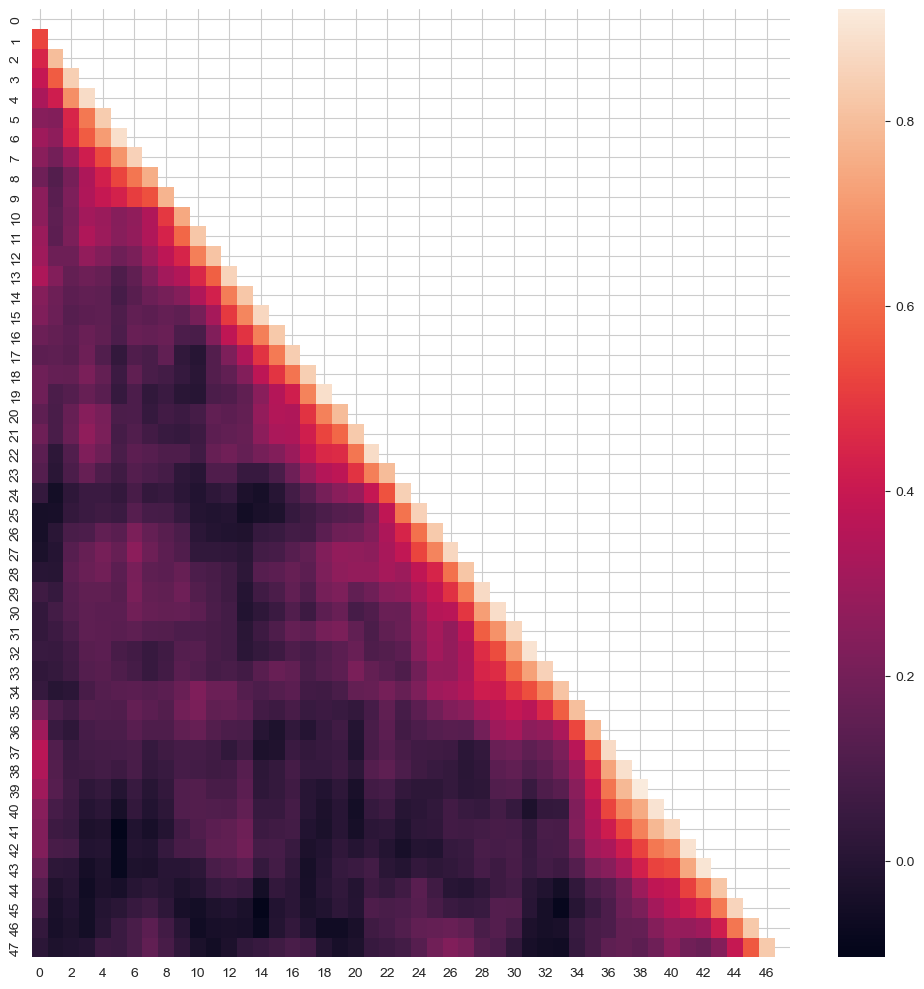

In [9]:
# show the temporal correlation heatmap

temp_corr = np.corrcoef(error, rowvar=False)

import seaborn as sns

plt.figure(figsize=(10, 10))
# only lower triangle and no diagonal
mask = np.triu(np.ones((error.shape[1], error.shape[1]), dtype=bool))
sns.heatmap(temp_corr, annot=False, fmt=".2f", mask=mask)
plt.tight_layout()

Now we fit maginal samples to a Gaussian KDE

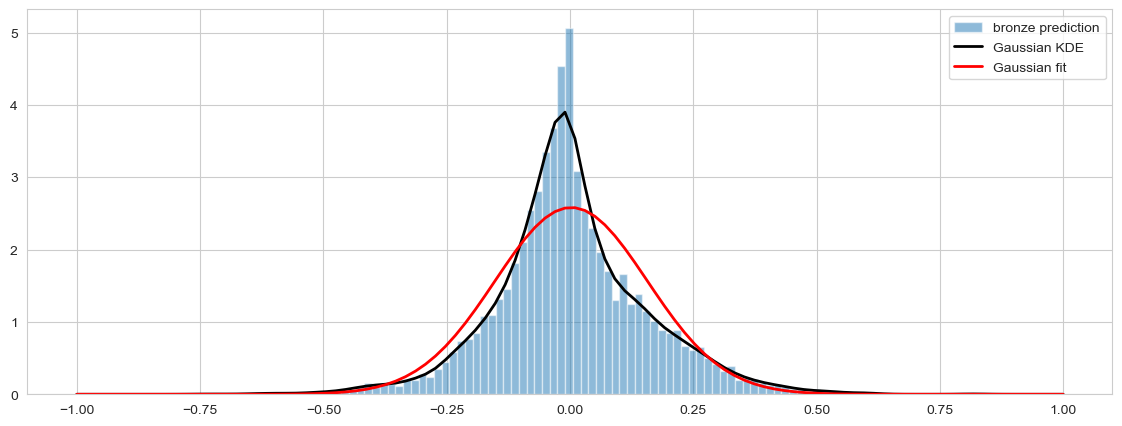

In [10]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde

marginal_error = error.flatten()
kde = gaussian_kde(marginal_error)
# make a smooth pdf curve
x = np.linspace(-1, 1, 100)
kde_pdf = kde.pdf(x)

# plot the histgram, Gaussian kde pdf and gaussian fit
plt.figure(figsize=(14, 5))
plt.hist(marginal_error, bins=100, alpha=0.5, label='bronze prediction', density=True)
plt.plot(x, kde_pdf, 'k', linewidth=2, label='Gaussian KDE')
# make a Gaussian fit
from scipy.stats import norm
mu, std = np.mean(marginal_error), np.std(marginal_error)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Gaussian fit')
plt.legend()
plt.show()

In [11]:
# next, generate temporal correlated samples based on Gaussian kde and corpula
from scipy import stats

# set lim by kde samples
xmax = np.max(marginal_error)
xmin = np.min(marginal_error)
n_scenario = 200000
# get multivar norm distribution samples
mvnorm = stats.multivariate_normal(mean=np.zeros(temp_corr.shape[0]), cov=temp_corr)
samples_gaussian = mvnorm.rvs(size=n_scenario, random_state=0)

# covert gaussian samples to uniform samples
norm = stats.norm()
samples_uniform = norm.cdf(samples_gaussian)

# convert each dim of uniform samples to the corresponding marginal distribution fitted by kde
# this requires to know the cdf and inverse cdf (i.e., ppf) of the kde
# 1. get the cdf
from scipy.special import ndtr
stdev = np.sqrt(kde.covariance)[0, 0]
minmax_dist = xmax - xmin
xx = np.linspace(xmin - 0.*minmax_dist, xmax + 0.*minmax_dist, 5000)
n = kde.resample(n_scenario, seed=0).flatten()
kde_cdf = ndtr(np.subtract.outer(xx, n)/stdev).mean(axis=1)

# find the index where kde_cdf equals to 0 or 1

# 2. now get the inverse cdf, which requires interpolation as approximation
from scipy import interpolate
kde_cdf_inv_func = interpolate.interp1d(kde_cdf, xx, kind='cubic', bounds_error=False, fill_value='extrapolate')

# now get the temporal correlated samples
samples_kde_corr = np.vstack([kde_cdf_inv_func(samples_uniform[:, i]) for i in range(temp_corr.shape[0])]).T
print(samples_kde_corr.shape)

(200000, 48)


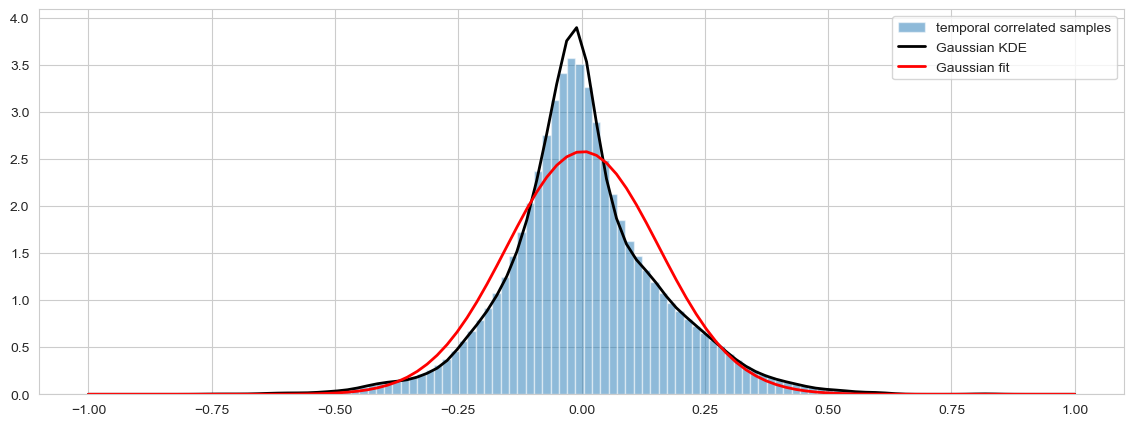

In [12]:
# plot the histograme of the temporal correlated samples marginals
plt.figure(figsize=(14, 5))
plt.hist(samples_kde_corr.flatten(), bins=100, alpha=0.5, label='temporal correlated samples', density=True)
plt.plot(x, kde_pdf, 'k', linewidth=2, label='Gaussian KDE')
plt.plot(x, p, 'r', linewidth=2, label='Gaussian fit')
plt.legend()
plt.show()

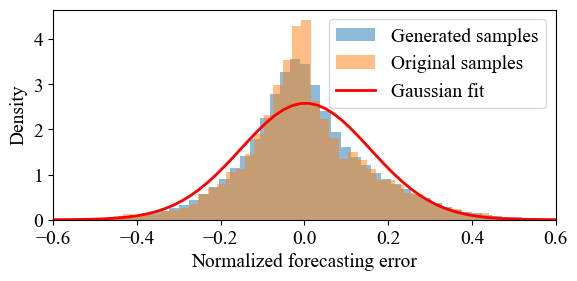

In [19]:
plt.style.use('default')
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    "mathtext.fontset": "cm",
})

# compare the generated samples with the original samples
plt.figure(figsize=(6, 3))
plt.hist(samples_kde_corr.flatten(), bins=70, alpha=0.5, label='Generated samples', density=True)
plt.hist(marginal_error, bins=70, alpha=0.5, label='Original samples', density=True)
plt.plot(x, p, 'r', linewidth=2, label='Gaussian fit')
# set x lim
plt.xlim(-0.6, 0.6)
plt.xlabel('Normalized forecasting error')
plt.ylabel('Density')
plt.legend()
plt.title('')
plt.tight_layout()
# adjust top and bottom margin
plt.subplots_adjust(top=0.9, bottom=0.2)

save_path = os.path.join(os.getcwd(), 'figure', 'forecasting_error_marginal.pdf')
plt.savefig(save_path, format='pdf', dpi=300)

plt.show()

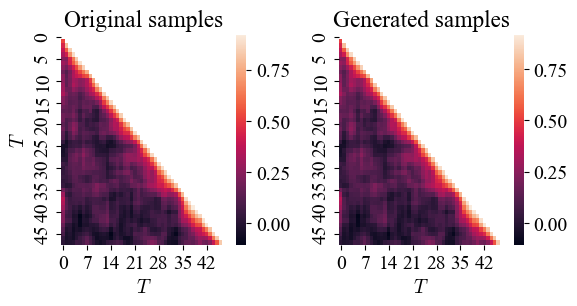

In [20]:
# display the temporal correlation heatmap of the generated samples
temp_corr_gen = np.corrcoef(samples_kde_corr, rowvar=False)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
# plot the original temporal correlation
axs[0].set_title('Original samples')
sns.heatmap(temp_corr, annot=False, fmt=".2f", mask=mask, ax=axs[0])
# plot the generated temporal correlation
axs[1].set_title('Generated samples')
sns.heatmap(temp_corr_gen, annot=False, fmt=".2f", mask=mask, ax=axs[1])
# set x and y labels to T
axs[0].set_xlabel('$T$')
axs[0].set_ylabel('$T$')
axs[1].set_xlabel('$T$')
plt.tight_layout()
# adjust top and bottom margin
plt.subplots_adjust(top=0.9, bottom=0.2)
# save
save_path = os.path.join(os.getcwd(), 'figure', 'forecasting_error_temporal_correlation.pdf')
plt.savefig(save_path, format='pdf', dpi=300)

The above results show that our generated samples capture the marginals and temporal correlations well.

In [15]:
# store the generated samples
# np.save(os.path.join('data', 'GEFC2012_temporal_correlated_error_samples.npy'), samples_kde_corr)

The other thing is the wind prototype (forecast)

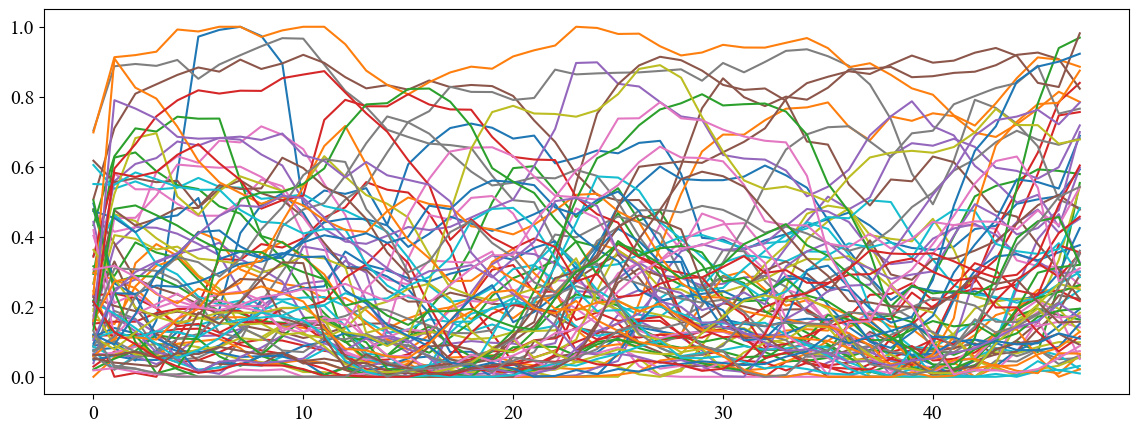

In [16]:
GEFC2012_forecast_wp2 = GEFC2012_bronze_prediction[['wp2']].values.reshape(-1, 48)
# cat to each row for a day
forecast_p1 = GEFC2012_forecast_wp2[::2]
forecast_p2 = GEFC2012_forecast_wp2[1::2]
forecast = forecast_p1.copy()
# plot the generation
plt.figure(figsize=(14, 5))
plt.plot(forecast.T, label='forecast')
plt.show()

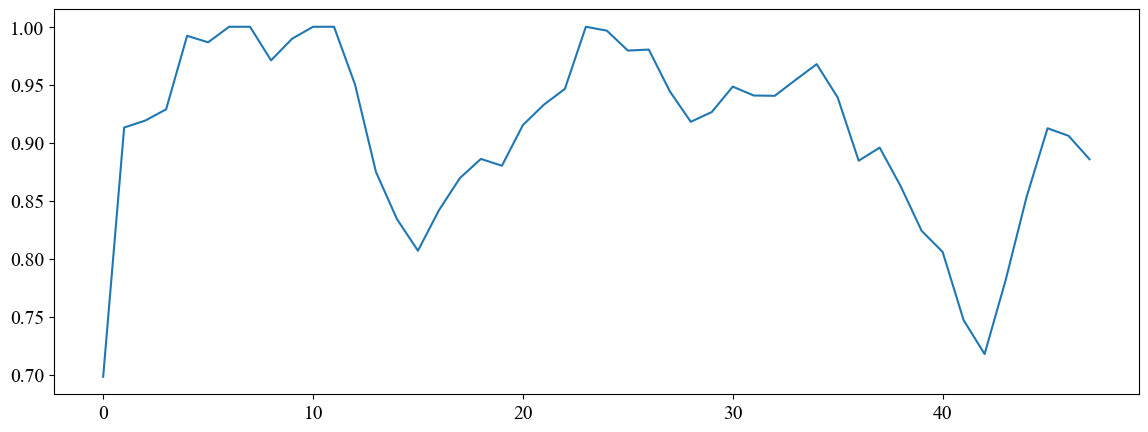

In [17]:
# find the day with the highest generation
day_max_forecast = np.argmax(np.sum(forecast, axis=1))
wind_max_forecast = forecast[day_max_forecast]
plt.figure(figsize=(14, 5))
plt.plot(wind_max_forecast)
# store the wind prototype
# np.save(os.path.join('data', 'GEFC2012_wind_forecast.npy'), wind_max_forecast)